# Parabolic vertical road curves

by Xiaofeng Liu, Ph.D., P.E.  
Associate Professor

Department of Civil and Environmental Engineering  
Institute of Computational and Data Sciences  
Penn State University  
223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

Roads and highways desigend over a terrain need to consider the vertical profile. Often, a vertical, parabolic curve is used, which can mathematically expressed as 
\begin{equation}
y = ax^2+bx+c
\end{equation}
where $x$ is the horizontal coordinate and $y$ is the vertical coordinate, and $a$, $b$, and $c$ are coefficients. Part of the design is to determine these coefficients $a$, $b$, and $c$.

<img src="vertical_curve.png" width="300"/>
<h3 align="center">Figure. Parabolic vertical road curve.</h3> 

From the figure above, the given conditions are as follows. First, the elevations at the beginning of the vertical curve (BVC) and the end of the vertical curve (EVC) are given. Second, the grades at the beginning ($G_B$) and the end ($G_E$) are provided. The grades are typically in percentage. The last given constrain is the total horizontal length $L$ of the curve. 

### Aproach 1

The grade (or slope) at any given $x$ is calcualted as 
\begin{equation}
\frac{dy}{dx} = 2ax + b
\end{equation}
So at BVC, $x$ = 0 and the grade is 
\begin{equation}
\frac{G_B}{100} = b
\end{equation}
and t EVC, $x$ = L and the grade is 
\begin{equation}
\frac{G_E}{100} = 2aL + b
\end{equation}

From these two equations, it is clear that
\begin{equation}
a = \frac{G_E-G_B}{200L}, \quad b= \frac{G_B}{100} \quad
\end{equation}
In addition, the third coefficient $c$ can be determined with the elevation at BVC where $x$ = 0. It is easy to show
\begin{equation}
c = \text{BVC}
\end{equation}

Putting everything together, the equation of the parabola becomes
\begin{equation}
y =  \frac{G_E-G_B}{200L}x^2+\frac{G_B}{100}x+\text{BVC}
\end{equation}

With the equatio above, if the two slopes $G_B$ and $G_E$, and the elevation of the starting pooint BVC are given, the curve is determined.

### Aproach 2

Another approach to determine the coefficients, and probably a more practical one, is to use three given points on the vertical curve. The following example is a straighforward demonstration of fitting a quadratic (parabolic) curve with three given points:

$x= 60$ m, $y= 122.20$ m  \
$x= 160$ m, $y= 123.00$ m \
$x= 260$ m, $y= 122.00$ m 

The total horizontal length $L$ is 300 m. The question is to find BVC, $G_B$, $G_E$, and the maximum elevation of the curve. To do that, we substitute the three sets of coordinates into $y = ax^2+bx+c$ to get

\begin{equation}
122.20 = a(60)^2+b(60)+c  \\
123.00 = a(160)^2+b(160)+c  \\
122.00 = a(260)^2+b(260)+c  \\
\end{equation}

which can be written as

\begin{equation}
3600a+60b+c = 122.20  \\
25600a+160b+c = 123.00  \\
67600a+260b+c = 122.00  \\
\end{equation}

or written in matrix form

\begin{equation}
\begin{bmatrix}
3600  & 60  & 1 \\
25600  & 160  & 1 \\
67600  & 260 & 1 
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
=
\begin{bmatrix}
122.20 \\
123.00 \\
122.00
\end{bmatrix}
\end{equation}

In the following code, we use Python library functions to solve the linear equation system problem shown above and plot the parabolic curve. 

solution  gives a =  -9e-05 b =  0.0278 c =  120.856


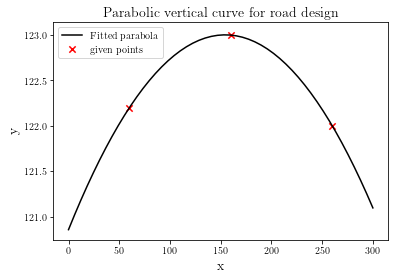

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#three given points on the vertical curve
xs=np.array([60,160,260])
ys=np.array([122.20,123.00,122.00])

A = np.array([[3600, 60, 1],[25600, 160, 1],[67600, 260, 1]])   #define matrix
b = np.array([122.20,123.00,122.00])                       #define vector

coeffs = np.linalg.solve(A,b)      #solve with the "solve(...)" function in Numpy.
print("solution  gives a = ", round(coeffs[0],5), "b = ", round(coeffs[1],4), "c = ", round(coeffs[2],3))

#plot the curve
x_fit = np.linspace(0,300,50)
y_fit = np.zeros(50)
for i in range(50):
    y_fit[i] = coeffs[0]*x_fit[i]**2 + coeffs[1]*x_fit[i] + coeffs[2]
    
plt.plot(x_fit,y_fit,c='k',label="Fitted parabola")

# plotting the given points
plt.scatter(xs, ys, c = "r", marker = "x", s = 40, label='given points') 

plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.title("Parabolic vertical curve for road design",fontsize=14)
plt.legend()
plt.show()

So the equation of the parabola is $y \approx -0.00009x^2 + 0.0278x + 120.86$. 

We can compare the results from the two approaches. Since from Approach 1, 
\begin{equation}
y =  \frac{G_2-G_1}{200L}x^2+\frac{G_1}{100}x+\text{BVC}
\end{equation}
If we plug in $x$ = 0, then the starting elevation BVC = 120.86 m. And

\begin{equation}
\frac{G_B}{100}= b = 0.0278
\end{equation}

thus $G_B$ = 2.78%

Also

\begin{equation}
\frac{G_E-G_B}{200L} =-0.00009
\end{equation}
with $L$ = 300 m. Thus, we can solve for $G_E$ to get $G_B$ = -5.37%, which is much steeper than the beginning grade. To get the maximum elevation on the curve, it is easy to get from the parabolic curve that the $x$ position should be
\begin{equation}
\frac{dy}{dx} = 2ax + b=0
\end{equation}
i.e., 
\begin{equation}
x = -\frac{b}{2a} = -\frac{0.0278}{2\times -0.00009} m = 154.44 m
\end{equation}
and the maximum elevation is then 
\begin{equation}
y \approx -0.00009x^2 + 0.0278x + 120.86 = -0.00009 \times 154.44^2 + 0.0278 \times 154.44 + 120.86 = 123.01 m
\end{equation}

